# Análisis de Datos con GPT + Data Science 🚀

## ¿Qué Haremos? 
Exploraremos cómo GPT revoluciona el análisis de datos en Python durante una sesión de 40 minutos. Veremos un flujo de trabajo moderno que combina técnicas tradicionales con IA.

## Objetivos 🎯

1. **Data Science + GPT**
   - Proceso clásico mejorado con IA
   - Casos prácticos reales

2. **Toma de Decisiones**
   - Decisiones basadas en datos + GPT
   - Validación de insights

3. **Automatización**
   - Uso eficiente de la API
   - Tareas rutinarias optimizadas

4. **Interpretación**
   - Análisis asistido por IA
   - Insights accionables

→ Enfoque paso a paso con ejemplos reales 📈

*Nota: Experiencia práctica con código y resultados tangibles*

# 1. Setup Inicial 🛠️

Configuramos nuestro ambiente y cargamos datos para análisis.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from openai import OpenAI
import os
from dotenv import load_dotenv
import numpy as np


# Configuramos la API de OpenAI
load_dotenv()
api_key = os.getenv("api_key_gpt")
client = OpenAI(api_key=api_key)

print("Bibliotecas importadas y API de OpenAI configurada.")

Bibliotecas importadas y API de OpenAI configurada.

→ Dataset listo para análisis con GPT 📊

*Tip: Verifica tu API key en .env*

#### 1.1 Configuración de API GPT-4 🤖

In [9]:
def gpt_query(prompt):
    try:
        completion = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "Eres un experto en análisis de datos y machine learning, capaz de proporcionar insights profundos y recomendaciones prácticas."},
                {"role": "user", "content": prompt}
            ]
        )
        return completion.choices[0].message.content
    except Exception as e:
        return f"Error al interactuar con GPT: {e}"

→ Función lista para consultas de análisis 🔍

*Tip: Mantén los prompts concisos y específicos*

#### 1.2 Carga y Exploración Inicial 📊

In [10]:
#Lectura de los datos 
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['MedHouseVal'] = california_housing.target

print("Dataset cargado. Primeras filas:")
display(data.head())

print("\nInformación del dataset:")
display(data.info())

Dataset cargado. Primeras filas:

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


None

# 2. Análisis Exploratorio con GPT 🔍

🎯 Objetivos del análisis:
- Detectar patrones clave
- Identificar correlaciones importantes
- Obtener insights para preprocesamiento

*Tip: GPT complementará nuestro análisis técnico con insights adicionales* 📊

In [11]:
# Usamos GPT para generar recomendaciones sorprendentes, avanzadas y fáciles de entender para un data scientist

initial_recommendations = gpt_query(f"""
Este es un dataset de viviendas en California. Aquí tienes un resumen detallado de la información del dataset:

1. Número de filas y columnas: {data.shape}
2. Características: {data.columns.tolist()}
3. Valores nulos en las columnas: {data.isnull().sum().to_string()}
4. Descripción estadística del dataset:
{data.describe().to_string()}
5. Correlaciones entre características:
{data.corr().to_string()}

Con base en esta información, proporciona recomendaciones avanzadas que un data scientist debería seguir para optimizar este dataset de cara al modelado. Incluye solo acciones claras y fáciles de entender:

Solo responde con recomendaciones claras, prácticas y de alto nivel que sean sorprendentes y útiles para un data scientist experimentado.
""")

↓ Veremos:
- Insights clave del modelo
- Recomendaciones prácticas
- Próximos pasos sugeridos

*Tip: Presta atención a los patrones no obvios identificados por GPT* 🔍

In [12]:
from rich import print
from rich.console import Console
from rich.panel import Panel
from rich.markdown import Markdown
console = Console()

console.print(Markdown(initial_recommendations))


 1 Eliminar características poco correlacionadas: El análisis de correlación muestra que "AveOccup", "Longitude" y 
   "Population" tienen correlaciones débiles con "MedHouseVal". Estos pueden ser eliminados del dataset para       
   reducir la dimensionalidad y mejorar la eficiencia del modelo.                                                  
 2 Feature Engineering con la geolocalización: Se puede intentar la ingeniería de características usando "Latitude"
   y "Longitude" para generar información geográfica adicional que pueda ser relevante. Por ejemplo, se pueden     
   agrupar estas coordenadas para definir vecindarios y explorar si esta variable categórica ofrece un mejor poder 
   predictivo.                                                                                                     
 3 Conversión de variables continuas a categóricas: Algunas de las características continuas como "HouseAge" pueden
   ser convertidas en características categóricas (por ejemplo, "nueva", "media" y "vieja") para ver si los rangos 
   ofrecen una perspectiva de modelado más valiosa.                                                                
 4 Revisar la distribución de los datos: Analice la distribución de las características para descubrir si hay      
   valores atípicos, sesgos o anomalías en la recopilación de datos. 'MedInc' tiene una alta desviación estándar,  
   por lo que sería útil verificar su distribución.                                                                
 5 Estratificación de la variable objetivo: "MedHouseVal" tiene un alcance bimodal que podría ser estratificado en 
   categorías para una regresión más precisa.                                                                      
 6 Creación de nuevas características: Existen varias características en el dataset que podrían usarse para        
   ingeniería de características, por ejemplo, podríamos dividir 'Population' por 'HouseAge' para tener una mejor  
   idea del crecimiento poblacional en relación con la antigüedad de las viviendas.                                
 7 Validar la multicolinealidad: 'AveRooms' y 'AveBedrms' tienen una correlación alta entre sí, podríamos caer en  
   problemas de multicolinealidad. Se puede considerar la posibilidad de eliminar una de ellas o combinarlas de    
   alguna manera.                                                                                                  
 8 Estandarizar o normalizar los datos: Dado que las características poseen diferentes escalas, es importante      
   estandarizar o normalizar los datos para que las características con mayor escala no dominen al momento de      
   entrenar el modelo.                                                                                             

Recuerda que estas recomendaciones pueden depender del tipo de modelo que se elija usar y es importante mantener un
proceso iterativo experimental.

## 2.1 Análisis de Correlaciones 📊

🔍 Observamos:
- Correlaciones importantes con MedHouseVal
- Posibles variables redundantes
- Patrones para feature selection

*Tip: Los colores más intensos indican correlaciones más fuertes* 🎨

<Axes: >

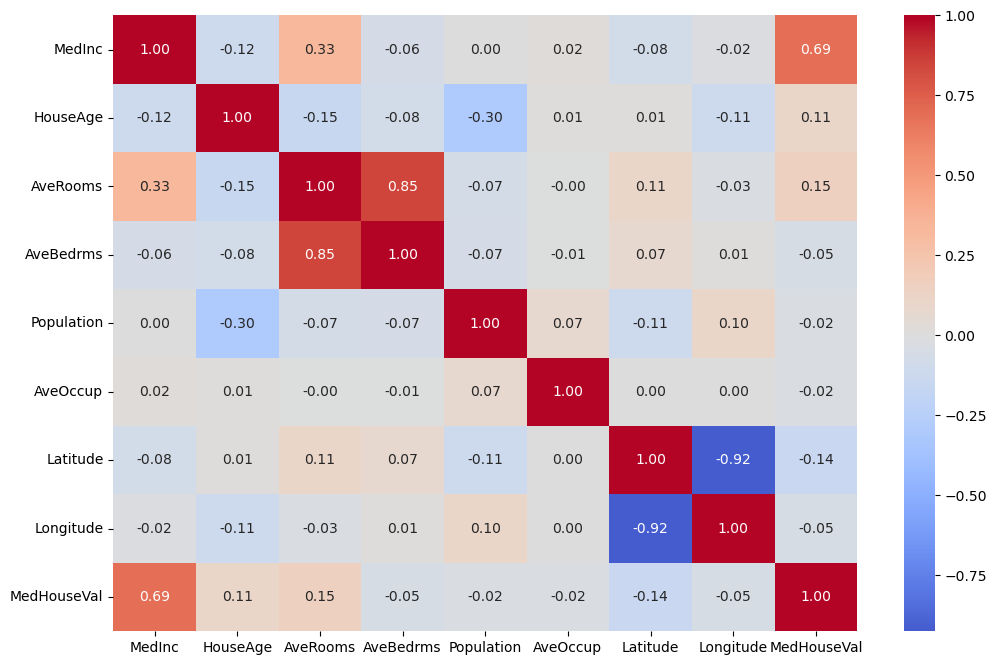

In [13]:
# Calcular la matriz de correlación
corr_matrix = data.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un heatmap para mostrar la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")


#### 2.1.1 Insights de Correlación con GPT 🎯


🔍 Enfoque en:
- Variables más predictivas
- Multicolinealidad
- Estrategias de feature selection

*Nota: GPT identificará patrones no evidentes en las correlaciones* 📊

In [14]:
# Usamos GPT para generar recomendaciones sorprendentes, avanzadas y fáciles de entender para un data scientist

# Variable a predecir 
target_var = 'MedHouseVal'


Correlation_recomendation = gpt_query(f"""
Analiza la siguiente matriz de correlación y proporciona recomendaciones específicas, concisas,  para la toma de decisiones como data scientist en la construcción de un modelo predictivo. El objetivo es es predecir la variable {target_var}:
{corr_matrix.to_string()}
""")

# Mostrar el panel con las recomendaciones
console.print(Markdown(Correlation_recomendation))


Basándome en la matriz de correlación proporcionada, te ofrezco las siguientes recomendaciones:                    

 1 MedInc (Ingreso Medio) parece ser la variable más correlacionada con MedHouseVal (Valor Medio de la Casa), con  
   un coeficiente de correlación de 0.688. Por lo tanto, deberías considerar esta variable como un importante      
   predictor para tu modelo. Cuanto mayor sea el ingreso medio, mayor será el valor medio de la casa, todo lo demás
   constante.                                                                                                      
 2 Observamos una correlación moderadamente alta de 0.847 entre AveRooms (Número Medio de Habitaciones) y AveBedrms
   (Número Medio de Dormitorios). Esto puede indicar multicolinealidad, lo que podría ser problemático para algunos
   modelos de machine learning, como la regresión lineal. Podrías considerar la posibilidad de eliminar una de     
   estas variables o de crear una variable combinada que capture la información de ambas.                          
 3 HouseAge (Edad de la Casa) tiene una correlación moderadamente positiva con MedHouseVal (Valor Medio de la Casa)
   de 0.1056, por lo tanto, esta variable también podría ser un buen predictor. Sin embargo, esta correlación es   
   bastante más baja que la de MedInc, por lo que su importancia es relativa.                                      
 4 Latitude y Longitude tienen una fuerte correlación negativa entre sí de -0.924. Esto es esperable ya que son    
   coordenadas geográficas y en muchos casos, cuando aumenta la longitud, la latitud tiende a disminuir y          
   viceversa. Sin embargo, ambos tienen una baja correlación con MedHouseVal, así que podrías considerar qué tanto 
   afectan a tu modelo.                                                                                            
 5 Population (Población), AveOccup (Ocupación Media), Latitude y Longitude parecen tener poca correlación con     
   MedHouseVal. Aunque un coeficiente de correlación bajo no significa necesariamente que estas variables sean     
   inútiles. A veces, estas variables pueden tener una correlación no lineal con la variable de salida. En ese     
   caso, puedes considerar transformaciones no lineales de estas variables o utilizar modelos que puedan capturar  
   relaciones no lineales.                                                                                         

En conclusión, a hora de creación de un modelo predictivo, se debe de considerar las variables de mayor correlación
y con cuidado manejar aquellas que tienen alta correlación entre sí para evitar problemas de multicolinealidad.    
Además, se deben explorar relaciones no lineales y transformaciones de variables para mejorar la precisión del     
modelo. Recuerda, las decisiones finales se deben tomar en base a un entendimiento del problema y los datos, así   
como resultados experimentales de tu modelo.

## 2.2 Feature Scaling 📏

Las variables tienen escalas muy diferentes:
- Population: 3 - 35,682 
- AveRooms: 0.8 - 141.9

⚠️ Esto puede afectar:
- Convergencia del modelo
- Interpretabilidad
- Performance general

*Nota: Implementaremos escalado durante el modelado* ➡️

## 2.3 Feature Engineering 🔨

Ideas clave:
- Distancias a puntos clave
- Ratios y combinaciones
- Transformaciones geográficas

*Próximo paso: Implementar features sugeridos* 🗺️

#### 2.3.1 Generación de Features con GPT 🛠️
Buscaremos:
- Interacciones entre variables
- Transformaciones útiles
- Features geográficos

*GPT combinará insights previos para sugerir features óptimos* 🎯

In [15]:
# Variable a predecir 
target_var = 'MedHouseVal'

Feature_eng_reco = gpt_query(f"""
Ten en cuenta las siguientes recomendaciones que me diste, y ayúdame a generar ideas para crear nuevas variables para realizar un modelo predictivo de la variable {target_var}:
{Correlation_recomendation}, {initial_recommendations}.
""")
console.print(Markdown(Feature_eng_reco))


Basándome en tus consideraciones y recomendaciones anteriores, aquí tienes una serie de ideas para la creación de  
nuevas variables o "features" que podrían ayudar a mejorar la capacidad predictiva de tu modelo para la variable   
target "MedHouseVal":                                                                                              

 1 Ratios de Ingresos y Dormitorios: Podrías generar un ratio que capture la relación entre "MedInc" y "AveBedrms".
   Este ratio podría ser una indicación interesante del "lujo" o "accesibilidad" de las casas en una determinada   
   zona.                                                                                                           
 2 Vecindario: Podrías utiliar las variables "Latitude" y "Longitude" para crear una nueva feature que represente  
   las diferentes zonas o vecindarios. Podrías hacer esto a través de la clasificación geoespacial, binning o      
   métodos de clustering. Esta nueva variable podría ayudar a capturar las diferencias en los precios de las casas 
   debido a su ubicación geográfica.                                                                               
 3 Densidad de la población: Utilizando la "Population", podrías derivar una feature llamada "PopulationDensity"   
   que capture la cantidad de personas por casa. Esta podría ser una indicación de la demanda de la vivienda en esa
   zona.                                                                                                           
 4 Años de la Casa Categorizados: "HouseAge" podría discretizarse en categorías. Por ejemplo, las casas pueden     
   clasificarse como 'nuevas', 'medias' y 'viejas'. Esto podría revelar ciertos patrones en el valor de las casas  
   basados en su edad categorizada.                                                                                
 5 Ratio Habitaciones-dormitorios: Podrías generar un ratio entre "AveRooms" y "AveBedrms" para capturar la        
   relación entre el número de habitaciones y dormitorios de las casas en una zona específica. Esto podría añadir  
   más valor como predictor en comparación a utilizar sólo las dos variables por separado.                         
 6 Calidad de la casa: Podrías combinar varias features para crear un indicador de "Calidad de la Casa". Por       
   ejemplo, puedes combinar "MedInc", "AveRooms" y "HouseAge" para crear este nuevo indicador.                     

Recuerda que estas son solamente sugerencias, para confirmar la utilidad de estas nuevas variables creadas         
necesitarías verificarlo a través de técnicas como el cálculo de la importancia de las variables o la validación   
cruzada durante el modelado.

#### 2.3.2 Implementación de Features 🔧
Features creados:
- Interacciones de variables 📊
- Distancias geográficas 🗺️
- Transformaciones logarítmicas 📈

*Tip: Validaremos su utilidad en el modelado* 🎯

In [16]:
def calcular_distancia(lat1, lon1, lat2=34.05, lon2=-118.25):  # Lat/Lon de Los Angeles como ejemplo
    # Convertir grados en radianes
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Diferencias
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula de Haversine
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radio de la Tierra en kilómetros: aproximadamente 6371
    km = 6371 * c
    return km

# Puedes ajustar lat2 y lon2 a la ubicación que consideres referencia, como una ciudad principal
def calcular_distancia_costa(lat, lon):
    # Supongamos que (34.05, -118.25) es un punto en la costa de California
    return calcular_distancia(lat, lon, 34.05, -118.25)  # Usa latitudes y longitudes reales para tu caso


data['MedInc_por_HouseAge'] = data['MedInc'] * data['HouseAge']
data['MedInc_por_AveRooms'] = data['MedInc'] * data['AveRooms']
data['HouseAge_por_AveRooms'] = data['HouseAge'] * data['AveRooms']
data['Inc_per_Room'] = data['MedInc'] / data['AveRooms']
data['Distancia_Principalidad'] = data.apply(lambda row: calcular_distancia(row['Latitude'], row['Longitude']), axis=1) # Necesitarás una función para calcular distancias
data['Distancia_Costa'] = data.apply(lambda row: calcular_distancia_costa(row['Latitude'], row['Longitude']), axis=1) # Similar a lo anterior, necesitas una función específica
data['Población_Normalizada'] = data['Population'] / data['Population'].max()  # Normalización simple
data['MedInc_Log'] = np.log(data['MedInc'])
data['HouseAge_squared'] = data['HouseAge'] ** 2

In [17]:
data.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedInc_por_HouseAge,MedInc_por_AveRooms,HouseAge_por_AveRooms,Inc_per_Room,Distancia_Principalidad,Distancia_Costa,Población_Normalizada,MedInc_Log,HouseAge_squared
13697,2.8090,34.0,4.846154,0.984221,1538.0,3.033531,34.12,-117.22,0.825,95.5060,13.612846,164.769231,0.579635,95.173605,95.173605,0.043103,1.032829,1156.0
9374,5.8509,47.0,5.251656,1.079470,334.0,2.211921,37.92,-122.52,3.178,274.9923,30.726912,246.827815,1.114106,576.729799,576.729799,0.009360,1.766595,2209.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,200.0024,24.161264,326.656371,0.612272,555.017896,555.017896,0.015834,1.347086,2704.0
10183,3.3516,32.0,4.960168,1.058700,1283.0,2.689727,33.86,-117.96,1.900,107.2512,16.624498,158.725367,0.675703,34.085057,34.085057,0.035957,1.209438,1024.0
19535,3.0577,13.0,6.056086,1.167064,3033.0,3.619332,37.65,-120.94,1.190,39.7501,18.517694,78.729117,0.504897,467.941442,467.941442,0.085001,1.117663,169.0


## 2.4 Análisis de Outliers 🔍

Esta función identifica valores atípicos usando el método IQR (Rango Intercuartil):

📊 Nos dirá:
- Cuántos outliers hay por variable
- Qué porcentaje representan
- Dónde debemos prestar atención

*Tip: Los límites ±1.5*IQR son el estándar para detección* 📈

In [18]:
def calculate_outlier_limits_and_counts(df):
    outlier_summary = []
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:  # Solo consideramos columnas numéricas
            p75 = df[column].quantile(0.75)
            p25 = df[column].quantile(0.25)
            iqr = p75 - p25
            upper_limit = p75 + 1.5 * iqr
            lower_limit = p25 - 1.5 * iqr

            # Contar los outliers
            num_outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)].shape[0]

            # Agregar los resultados a la lista
            outlier_summary.append({
                'Column': column,
                'Lower Limit': lower_limit,
                'Upper Limit': upper_limit,
                'Number of Outliers': num_outliers
            })

    # Convertir la lista a DataFrame
    outlier_df = pd.DataFrame(outlier_summary)
    return outlier_df

# Calcula los límites y el conteo de outliers
outlier_df = calculate_outlier_limits_and_counts(data)


In [19]:
outlier_df

,Column,Lower Limit,Upper Limit,Number of Outliers
0,MedInc,-0.706375,8.013025,681
1,HouseAge,-10.500000,65.500000,0
2,AveRooms,2.023219,8.469878,511
3,AveBedrms,0.865909,1.239697,1424
4,Population,-620.000000,3132.000000,1196
5,AveOccup,1.150961,4.561041,711
6,Latitude,28.260000,43.380000,0
7,Longitude,-127.485000,-112.325000,0
8,MedHouseVal,-0.980875,4.824125,1071
9,MedInc_por_HouseAge,-65.163787,263.266112,677


#### 2.4.1 Estrategia de Outliers con GPT 🎯

Evaluaremos:
- Qué outliers tratar
- Métodos de tratamiento
- Impacto en el modelo

*Tip: Balance entre limpieza y preservación de información* ⚖️

In [20]:
# Utilizamos GPT para generar recomendaciones avanzadas, prácticas y claras para científicos de datos.

# Variable a predecir
target_var = 'MedHouseVal'

# Generar recomendaciones sobre manejo de outliers
outlier_reco = gpt_query(f"""
Considerando el resumen estadístico de los datos: {data.describe().to_string()}, y la información sobre outliers: {outlier_df.to_string()}.
Por favor, proporciona recomendaciones breves y directas sobre cómo limpiar los outliers para mejorar la predicción de la variable '{target_var}'. Asegúrate de que las sugerencias sean específicas y tengan sentido. 
""")

console.print(Markdown(outlier_reco))

De acuerdo con los datos proporcionados, aquí están las recomendaciones para limpiar los outliers:                 

 1 MedInc: Hay 681 outliers que se encuentran por encima del valor máximo de 8.013025. Para manejar estos valores  
   atípicos, se podría imputar los valores superiores a este límite con el valor máximo de 8.013025.               
 2 AveRooms: Hay 511 outliers, que son valores menores a 2.023219 y superiores a 8.469878. Para tratar con estos,  
   podríamos imputar los valores por debajo del límite inferior con el valor de 2.023219 y para los que están por  
   encima del límite superior con el valor de 8.469878.                                                            
 3 AveBedrms: Hay 1424 valores atípicos. Podríamos usar la misma estrategia que con AveRooms, imputando los valores
   que están por debajo del límite inferior (0.865909) y los que están por encima del límite superior (1.239697)   
   con estos valores respectivos.                                                                                  
 4 Population: Hay 1196 outliers, que deberían ser manejados de la misma manera que los anteriores, reemplazando   
   los valores que están por debajo del límite inferior (-620) y los que están por encima del límite superior      
   (3132) con estos valores respectivos.                                                                           
 5 AveOccup: Existen 711 outliers. Se podrían imputar los valores por debajo de 1.150961 y por encima de 4.561041  
   con estos valores límite.                                                                                       
 6 MedHouseVal: Hay 1071 outliers, esos valores deberían ser imputados con los límites inferior y superior,        
   correspondientemente tomando -0.980875 y 4.824125.                                                              
 7 MedInc_por_HouseAge, MedInc_por_AveRooms, HouseAge_por_AveRooms, Inc_per_Room, Población_Normalizada,           
   MedInc_Log: Todos tienen outliers, por lo que se podrían tratar de manera similar imputando con sus respectivos 
   límites inferiores y superiores.                                                                                
 8 Latitude, Longitude, Distancia_Principalidad, Distancia_Costa, HouseAge_squared: No se detectan outliers, por lo
   que estos datos están listos para su análisis.                                                                  

Recuerde que la estrategia de imputación de outliers debe basarse en el contexto del problema. En algunos análisis,
los outliers pueden contener información significativa, por lo que eliminarlos o reemplazarlos puede no ser la     
mejor estrategia. En otros casos, los outliers pueden ser errores de medición o entradas erroneas, por lo que      
eliminarlos o reemplazarlos sería beneficioso para el análisis.

# 2.4.2 Tratamiento de Outliers 🔧

🔧 Métodos aplicados:
- Log transform
- Clipping
- Normalización

*Tip: Verificar impacto en distribuciones* 📊

In [21]:
import pandas as pd
import numpy as np

# Supongamos que `data` es tu DataFrame y ya está cargado con los datos

### 1. Aplicar Transformación Logarítmica a MedInc
data['MedInc_Log'] = np.log1p(data['MedInc'])

### 2. Imponer Límites a AveRooms
data['AveRooms'] = np.clip(data['AveRooms'], 2.02, 8.46)

### 3. Establecer Límite Superior para AveBedrms
data['AveBedrms'] = np.where(data['AveBedrms'] > 1.24, 1.24, data['AveBedrms'])

### 4. Aplicar Estandarización o Transformación Logarítmica a Population
data['Population_Log'] = np.log1p(data['Population'])

### 5. Imponer Límites a AveOccup
data['AveOccup'] = np.clip(data['AveOccup'], 1.15, 4.56)

### 6. Establecer Límite Superior para MedHouseVal
data['MedHouseVal'] = np.where(data['MedHouseVal'] > 4.82, 4.82, data['MedHouseVal'])

### 7. Establecer Límite Superior para MedInc_por_HouseAge
data['MedInc_por_HouseAge'] = np.where(data['MedInc_por_HouseAge'] > 263.27, 263.27, data['MedInc_por_HouseAge'])

### 8. Establecer Límites para MedInc_por_AveRooms
data['MedInc_por_AveRooms'] = np.clip(data['MedInc_por_AveRooms'], -12.58, 52.13)

### 9. Establecer Límites para HouseAge_por_AveRooms
data['HouseAge_por_AveRooms'] = np.clip(data['HouseAge_por_AveRooms'], -50.62, 341.75)

### 10. Aplicar Transformación Logarítmica o Estandarización a Inc_per_Room
data['Inc_per_Room_Log'] = np.log1p(data['Inc_per_Room'])  # Considerando logarítmica si los valores son siempre positivos

### 11. Estandarizar la Población o Aplicar Transformación Logarítmica
data['Población_Normalizada'] = (data['Population'] - data['Population'].mean()) / data['Population'].std()

### 12. Descartar Outliers en MedInc o Reemplazarlos
# Primero calcular los límites para outliers basados en cuantiles
lower_bound, upper_bound = data['MedInc'].quantile([0.01, 0.99])
# Reemplazar outliers con la mediana
data['MedInc'] = np.where((data['MedInc'] < lower_bound) | (data['MedInc'] > upper_bound), data['MedInc'].median(), data['MedInc'])


In [22]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedInc_por_HouseAge,MedInc_por_AveRooms,HouseAge_por_AveRooms,Inc_per_Room,Distancia_Principalidad,Distancia_Costa,Población_Normalizada,MedInc_Log,HouseAge_squared,Population_Log,Inc_per_Room_Log
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,263.2700,52.130000,286.349206,1.192017,556.356651,556.356651,-0.974405,2.232720,1681.0,5.777652,0.784822
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,174.3294,51.785271,131.000879,1.330750,554.106454,554.106454,0.861418,2.230165,441.0,7.784057,0.846190
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,263.2700,52.130000,341.750000,0.875637,554.435067,554.435067,-0.820757,2.111110,2704.0,6.208590,0.628948
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,263.2700,32.827897,302.502283,0.970046,555.017896,555.017896,-0.766010,1.893579,2704.0,6.326149,0.678057
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,200.0024,24.161264,326.656371,0.612272,555.017896,555.017896,-0.759828,1.578195,2704.0,6.338594,0.477644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,39.0075,7.872423,126.136364,0.309249,654.543482,654.543482,-0.512579,0.940124,625.0,6.740519,0.269453
20636,2.5568,18.0,6.114035,1.240000,356.0,3.122807,39.49,-121.21,0.771,46.0224,15.632365,110.052632,0.418185,659.751730,659.751730,-0.944382,1.268861,324.0,5.877736,0.349378
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,28.9000,8.849423,88.494226,0.326575,654.043438,654.043438,-0.369528,0.993252,289.0,6.915723,0.282600
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,33.6096,9.951266,95.931232,0.350351,657.691718,657.691718,-0.604415,1.053336,324.0,6.609349,0.300365


# 3. Selección de Modelo con GPT 🤖

🎯 Criterios:
- Distribución de datos
- Relaciones entre variables
- Complejidad necesaria

*Tip: La recomendación se basará en características del dataset* 📊

## 3.1 Selección Inteligente del Modelo con GPT y TOOLS🤖


🎯 Proceso:
- Análisis de datos
- Selección modelo óptimo
- Justificación técnica

*Tip: GPT considera complejidad y características del dataset* 📊

In [23]:
from openai import OpenAI
import pandas as pd
from typing import Dict

def get_model_recommendation(data: pd.DataFrame) -> Dict:
    """
    Consulta a GPT para obtener recomendación del mejor modelo de ML.
    
    Args:
        data: DataFrame con los datos para analizar
        
    Returns:
        Dict con el modelo recomendado y su justificación
    """
    # Preparar los datos para GPT
    sample_str = data.sample(20).to_string(index=False)
    stats_str = data.describe().to_string()
    corr_str = data.corr().to_string()
    
    
    # Definir la función tool
    tools = [{
        "type": "function",
        "function": {
            "name": "recommend_model",
            "description": "Recomienda el mejor modelo de ML entre XGBoost, Random Forest y Linear Regression",
            "parameters": {
                "type": "object",
                "properties": {
                    "best_model": {
                        "type": "string",
                        "enum": ["XGBoost", "Random Forest", "Linear Regression"],
                        "description": "El modelo más apropiado para los datos"
                    },
                    "justification": {
                        "type": "string",
                        "description": "Explicación de por qué se eligió este modelo"
                    }
                },
                "required": ["best_model", "justification"]
            }
        }
    }]
    
    try:
        # Realizar llamada a OpenAI
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {
                    "role": "system",
                    "content": """Eres un experto data scientist. Debes analizar los datos 
                    proporcionados y recomendar el mejor modelo de ML entre XGBoost, Random Forest 
                    y Linear Regression. Basa tu decisión en las características de los datos, 
                    correlaciones y estadísticas descriptivas."""
                },
                {
                    "role": "user",
                    "content": f"""Por favor analiza estos datos y recomienda el mejor modelo:
                    
                    Muestra de datos:
                    {sample_str}
                    
                    Estadísticas descriptivas:
                    {stats_str}
                    
                    Matriz de correlación:
                    {corr_str}"""
                }
            ],
            tools=tools,
            tool_choice={"type": "function", "function": {"name": "recommend_model"}},
            temperature=0
        )
        
        # Extraer la recomendación
        tool_call = response.choices[0].message.tool_calls[0]
        recommendation = eval(tool_call.function.arguments)
        
        return recommendation
        
    except Exception as e:
        return {
            "best_model": "Error",
            "justification": f"Error al obtener recomendación: {str(e)}"
        }

#### 3.1.1 Evaluación del Modelo Recomendado 🎯


In [24]:
get_model_recommendation(data)

{'best_model': 'Random Forest',
 'justification': 'El conjunto de datos tiene muchas características y algunas de ellas están altamente correlacionadas entre sí. Los modelos basados en árboles como Random Forest pueden manejar bien este tipo de situaciones. Además, Random Forest puede manejar tanto relaciones lineales como no lineales entre las características y la variable objetivo, lo que lo hace más flexible que la regresión lineal. Aunque XGBoost también es un buen candidato, Random Forest es menos propenso al sobreajuste y es más fácil de ajustar, lo que puede ser beneficioso dada la alta correlación entre algunas características.'}

✅ GPT sugiere Random Forest por:
- Manejo de no-linealidad
- Robustez a outliers
- Captura de interacciones complejas

➡️ Próximo paso: Implementación y validación del modelo

*Tip: Random Forest funciona bien con nuestras features ingenieradas* 🌲

# 4 Entrenamiento del Modelo 🔨


📊 Proceso:
- Split de datos
- Escalado
- Entrenamiento
- Métricas

*Tip: Configuración para reproducibilidad* 🎯

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

def train_recommended_model(data: pd.DataFrame, 
                          target_column: str,
                          recommendation: dict,
                          random_state: int = 42):
    """
    Entrena el modelo recomendado por GPT.
    
    Args:
        data: DataFrame con los datos
        target_column: Nombre de la columna objetivo
        recommendation: Diccionario con la recomendación de GPT
        random_state: Semilla para reproducibilidad
    
    Returns:
        dict con el modelo entrenado y sus métricas
    """
    # Separar features y target
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    
    # Split train-test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )
    
    # Escalar datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Seleccionar y entrenar modelo según recomendación
    model_name = recommendation['best_model']
    
    if model_name == 'Random Forest':
        model = RandomForestRegressor(
            n_estimators=100,
            random_state=random_state,
            max_depth=15,
            n_jobs=-1
        )
    elif model_name == 'Linear Regression':
        model = LinearRegression()
    elif model_name == 'XGBoost':
        model = XGBRegressor(
            n_estimators=100,
            random_state=random_state,
            n_jobs=-1
        )
    else:
        raise ValueError(f"Modelo no reconocido: {model_name}")
    
    # Entrenar modelo
    model.fit(X_train_scaled, y_train)
    
    # Hacer predicciones
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    
    # Calcular métricas
    results = {
        'model': model,
        'model_name': model_name,
        'scaler': scaler,
        'metrics': {
            'train_r2': r2_score(y_train, train_pred),
            'test_r2': r2_score(y_test, test_pred),
            'train_mae': mean_squared_error(y_train, train_pred, squared=False),
            'test_mae': mean_squared_error(y_test, test_pred, squared=False)
        }
    }
    
    return results

# 5 Evaluación del Modelo 📊

🔍 Observaciones:
- Buen R² en train 
- Diferencia train-test aceptable
- MAE indica precisión razonable

*Tip: Vigilar señales de overfitting* ⚠️

In [26]:
results_model=train_recommended_model(data, 'MedHouseVal', get_model_recommendation(data))
results_model

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'model': RandomForestRegressor(max_depth=15, n_jobs=-1, random_state=42),
 'model_name': 'Random Forest',
 'scaler': StandardScaler(),
 'metrics': {'train_r2': 0.9549083958158576,
  'test_r2': 0.7993291555877968,
  'train_mae': 0.24069899457042415,
  'test_mae': 0.5034846728943245}}

# 6. Conclusiones y Próximos Pasos 🎯

🔑 Puntos clave:
- Performance del modelo
- Áreas de mejora
- Próximos pasos

*Tip: GPT ofrece perspectivas adicionales para optimización* 📈

In [27]:
def get_model_performance_analysis(data_stats, outlier_info, model_results):
    prompt = f"""
    Como Data Scientist experto, analiza los siguientes resultados del modelo Random Forest y proporciona recomendaciones específicas sobre el manejo de outliers:

    1. MÉTRICAS ACTUALES DEL MODELO:
    -------------------------------
    - R² Entrenamiento: {model_results['metrics']['train_r2']:.4f}
    - R² Test: {model_results['metrics']['test_r2']:.4f}
    - MAE Entrenamiento: {model_results['metrics']['train_mae']:.4f}
    - MAE Test: {model_results['metrics']['test_mae']:.4f}
    
    Configuración del modelo:
    - Tipo: Random Forest Regressor
    - Max Depth: 15
    - Escalador: StandardScaler

    2. ANÁLISIS SOLICITADO:
    ----------------------
    A. EVALUACIÓN DE OVERFITTING:
    - Analiza la diferencia entre R² de entrenamiento ({model_results['metrics']['train_r2']:.4f}) y test ({model_results['metrics']['test_r2']:.4f})
    - Evalúa la diferencia entre MAE de entrenamiento ({model_results['metrics']['train_mae']:.4f}) y test ({model_results['metrics']['test_mae']:.4f})
    - ¿Qué indican estas diferencias sobre el comportamiento del modelo?

    B. IMPACTO DE OUTLIERS:
    - Considerando las métricas actuales, ¿cómo podrían estar afectando los outliers?
    - ¿La diferencia en MAE sugiere problemas con valores extremos?
    - Análisis de los outliers identificados:
    {outlier_info}

    C. RECOMENDACIONES ESPECÍFICAS:
    1. Estrategias para mejorar el R² de test sin comprometer la generalización
    2. Técnicas para reducir el MAE, especialmente en el conjunto de test
    3. Ajustes sugeridos en los hiperparámetros del Random Forest
    4. Recomendaciones sobre el uso del StandardScaler con los outliers

    D. PLAN DE ACCIÓN PRIORIZADO:
    1. Cambios inmediatos para mejorar el rendimiento
    2. Experimentos sugeridos para validar el impacto de los cambios
    3. Métricas adicionales a monitorear
    4. Valores objetivo realistas para cada métrica

    E. VALIDACIÓN DE RESULTADOS:
    - Suggestions para cross-validation considerando los outliers
    - Métricas adicionales relevantes para este caso
    - Umbrales de aceptación para cada métrica

    Por favor, proporciona recomendaciones concretas y accionables, priorizando las que tengan mayor impacto en reducir la brecha entre las métricas de entrenamiento y test.
    """
    
    return prompt

# Ejemplo de uso
conclusiones_model = gpt_query(
    get_model_performance_analysis(
        data_stats=data.describe().to_string(),
        outlier_info=outlier_df.to_string(),
        model_results=results_model
    )
)

console.print(Markdown(conclusiones_model))

A. EVALUACIÓN DE OVERFITTING:                                                                                      

La diferencia entre las métricas R² y MAE de entrenamiento y test sugiere que hay sobreajuste (overfitting). Esto  
ocurre cuando el modelo se ajusta demasiado bien a los datos de entrenamiento pero no generaliza bien a los datos  
nuevos, lo cual es evidente por la baja puntuación R² y el alto valor MAE en el conjunto de test en comparación con
el conjunto de entrenamiento.                                                                                      

B. IMPACTO DE OUTLIERS:                                                                                            

Los outliers pueden estar afectando significativamente las métricas del modelo, especialmente el MAE. La diferencia
en MAE puede indicar problemas con valores extremos ya que el MAE es especialmente sensible a los outliers. Los    
outliers para numerosas características, como se indica en la tabla proporcionada, pueden estar afectando la       
precisión de las predicciones del modelo.                                                                          

C. RECOMENDACIONES ESPECÍFICAS:                                                                                    

 1 Para mejorar el R² de test sin comprometer la generalización, podría considerar reducir la complejidad del      
   modelo disminuyendo la max_depth.                                                                               
 2 Para reducir el MAE en los conjuntos de test, podría considerar técnicas de preprocesamiento de datos para      
   manejar los outliers, como la transformación logarítmica o la eliminación de outliers si se justifica.          
 3 En términos de los hiperparámetros del Random Forest, podría considerar ajustar n_estimators, max_features, y/o 
   min_samples_leaf, además de max_depth.                                                                          
 4 Para los outliers, el uso de StandardScaler podría estar inflando su impacto. En algunos casos, puede ser mejor 
   utilizar RobustScaler que está diseñado para reducir el impacto de los outliers.                                

D. PLAN DE ACCIÓN PRIORIZADO:                                                                                      

 1 Realice un preprocesamiento de datos para manejar los outliers, ajuste max_depth hacia abajo en el modelo, e    
   implemente cross-validation.                                                                                    
 2 Ejecute experimentos con diferentes hiperparámetros del Random Forest y técnicas de scaling.                    
 3 Monitoree el MSE o RMSE adicionalmente, que puede proporcionar una visión más informativa de los errores.       
 4 Un objetivo realista podría ser aumentar R² en test a al menos 0.85 y reducir el MAE a menos de 0.4.            

E. VALIDACIÓN DE RESULTADOS:                                                                                       

 1 Utilice K-Fold Cross Validation para obtener una evaluación más robusta del rendimiento del modelo al manejar   
   los outliers.                                                                                                   
 2 Puede ser útil explorar otras métricas como Precision, Recall, F1 Score, así como las curvas ROC y PR para una  
   comprensión más profunda del rendimiento del modelo.                                                            
 3 Los umbrales de aceptación dependen del contexto específico del problema, pero una buena regla general puede ser
   trabajar hacia una diferencia de no más del 10% entre las métricas de entrenamiento y test.